In [9]:
import cv2
import math
import random
import time
import matplotlib.pyplot as plt
from skimage.io import imread

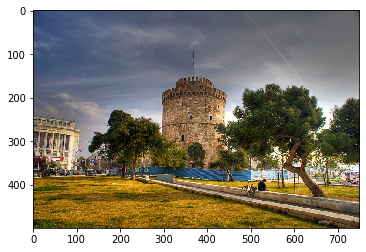

In [10]:
input_img_slic = cv2.imread("wt_slic.png")
img_slic = cv2.cvtColor(input_img_slic, cv2.COLOR_BGR2RGB)
plt.imshow(img_slic)

In [11]:
def SLIC(img, block):
    centroids = []
    img_row, img_col = img.shape[0], img.shape[1]

#As centroid appears at block/2 , we are checking if we are at centroid    
    for i in range(img_row):
        for j in range(img_col):
            if ((i - block/2) % block) == 0 and ((j - block/2) % block) == 0 and i != 0 and j != 0:
                centroids.append([i, j])

#looking for perfect centroid, initializing mag to infinity 
    for k in range(len(centroids)):

        mag = math.inf
        new_pt = [0, 0]
        y = centroids[k][0]
        x = centroids[k][1]

#3x3 windows centered
        for i in range(-1, 1):
            for j in range(-1, 1):
                updated_mag = math.sqrt(float(int(img[y+i+1][x+j+1][0]) - int(img[y+i][x+j][0]))**2 + float(int(img[y+i+1][x+j+1][1]) - int(img[y+i][x+j][1]))**2 + float(int(img[y+i+1][x+j+1][2]) - int(img[y+i][x+j][2]))**2)

#updating mag if its smaller
                if updated_mag < mag:
                    mag = updated_mag
                    new_pt = [y+i, x+j]
        centroids[k] = new_pt
    Output_img = K_means(img, centroids)

    return Output_img

In [12]:
def Cal_Dist(x1, y1, r1, g1, b1, x2, y2, r2, g2, b2):
    r = pow((float(r1)-float(r2)),2)
    g = pow((float(g1)-float(g2)),2)
    b = pow((float(b1)-float(b2)),2)
    x = pow((float(x1)-float(x2)),2)/2
    y = pow((float(y1)-float(y2)),2)/2
    dist = math.sqrt(r + g + b + x + y)
    return dist

In [17]:
def K_means(img, centroids):

    ctr = []
    img_row, img_col = img.shape[0], img.shape[1]
#Flag to indicate cluster  conversion
    Flag = False

#5D space of x, y, R, G, B 
    for i in range(len(centroids)):
        centroid = centroids[i]
        x = centroid[1]
        y = centroid[0]
        ctr.append([x, y, img[y][x][2], img[y][x][1], img[y][x][0]])

        
    while(Flag == False):
        clust = []

        for i in range(len(centroids)):
            clust.append([])


#initailizing distance to infinity
        for i in range(img_row):
            for j in range(img_col):
                dist = math.inf

#index to know which data points belongs to which cluster
                index = 0

#Checking the distance between data points and center
                for z in range(len(clust)):
                    center = ctr[z]
                    centerR, centerG, centerB = center[2], center[3], center[4]
                 

#Getting the individual colors values for the pixel. OpenCV stores images as BGR by default
                    dataR, dataG, dataB = img[i][j][2], img[i][j][1], img[i][j][0]
                    updated_dist = Cal_Dist(center[0], center[1], centerR, centerG, centerB, j, i, dataR, dataG, dataB)

                    if updated_dist < dist:
                        dist = updated_dist
                        index = z

#Adding the datapoints to the cluster which are closer to respective cluster
                clust[index].append([j, i, img[i][j][2], img[i][j][1], img[i][j][0]])
                
#updating new cluster ctr
        for i in range(len(clust)):
            cluster = clust[i]
            if len(cluster) == 0:
                continue
            avgR, avgG, avgB = 0, 0, 0


#Finding the average of RGB points in the cluster
            for j in range(len(cluster)):
                avgR += cluster[j][2]
                avgG += cluster[j][3]
                avgB += cluster[j][4]

            avgR = int(avgR/len(cluster))
            avgG = int(avgG/len(cluster))
            avgB = int(avgB/len(cluster))

#updating ctr value if change else converged
            if avgR != ctr[i][2] or avgG != ctr[i][3] or avgB != ctr[i][4]:
                ctr[i][2] = avgR
                ctr[i][3] = avgG
                ctr[i][4] = avgB
            else:
                Flag = True

    output_img = img.copy()

#Representing each cluster with the average RGB value of its members
    for z in range(len(clust)):
        cluster = clust[z]
        center = ctr[z]
        for point in cluster:
            output_img[point[1]][point[0]][2] = center[2] 
            output_img[point[1]][point[0]][1] = center[3] 
            output_img[point[1]][point[0]][0] = center[4] 

    return output_img

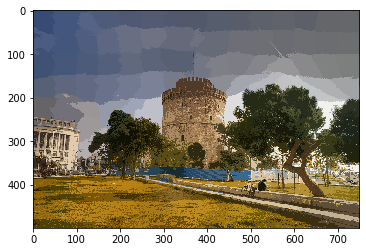

In [18]:
output_img_slic = SLIC(input_img_slic, 50)
output_slic = cv2.cvtColor(output_img_slic, cv2.COLOR_BGR2RGB)
plt.imshow(output_slic)

In [19]:
def Borders(img):
    output = img.copy()
    img_row, img_col = img.shape[0], img.shape[1]
#Looking for change in pixel value
    for i in range(img_row - 1):
        for j in range(img_col - 1):
#if we are at border continue
            if i == 0 or j == 0:
                continue
            else:
#3X3 search space, if change in pixel then set it to black
                for x in range(-1, 1):
                    for y in range(-1, 1):
                        if (img[i][j][0] == img[i+x][j+y][0]) and (img[i][j][1] == img[i+x][j+y][1]) and (img[i][j][2] == img[i+x][j+y][2]):
                            continue
                        else:
                            output_img[i][j] = [0, 0, 0]

    return output_img

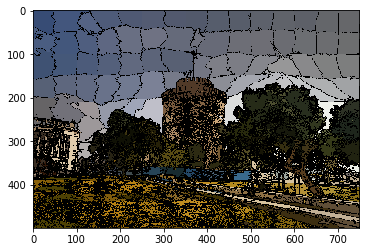

In [20]:
output_img_borders = Borders(output_img_slic)
output_borders = cv2.cvtColor(output_img_borders, cv2.COLOR_BGR2RGB)
plt.imshow(output_borders)